<h1> Stock Market Analysis

<h3> Importing necessary libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


<h3> Loading and reading the data

In [64]:
df=pd.read_csv("tesla-stock-price.csv")
df.head()

,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.88,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700


<h3> Summary of data

In [18]:
df.shape

(757, 6)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    757 non-null    object 
 1   close   757 non-null    float64
 2   volume  757 non-null    object 
 3   open    757 non-null    float64
 4   high    757 non-null    float64
 5   low     757 non-null    float64
dtypes: float64(4), object(2)
memory usage: 35.6+ KB


In [22]:
df.describe()

,close,open,high,low
count,757.000000,757.000000,757.000000,757.000000
mean,272.645614,272.760659,277.122776,268.017399
std,58.378585,58.449827,59.194761,57.515736
min,143.670000,142.320000,154.970000,141.050000
25%,219.560000,219.640000,222.569000,216.080000
50%,277.450000,277.625000,280.789900,273.550000
75%,322.690000,321.560000,327.120000,316.560100
max,385.000000,386.690000,389.610000,379.345000


<h3> Explanatory data analysis

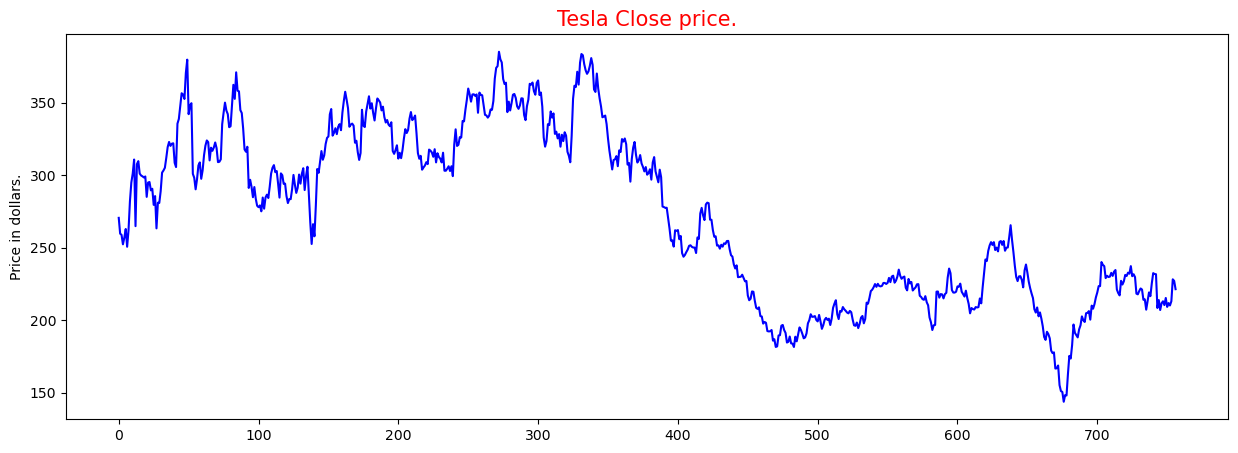

In [29]:
plt.figure(figsize=(15,5))
plt.plot(df['close'],c="blue")
plt.title('Tesla Close price.', fontsize=15,c="red")
plt.ylabel('Price in dollars.')
plt.show()

In [30]:
df.head()

,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.88,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700


In [35]:
df.isnull().sum()

date      0
close     0
volume    0
open      0
high      0
low       0
dtype: int64

In [47]:
for col in features:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')


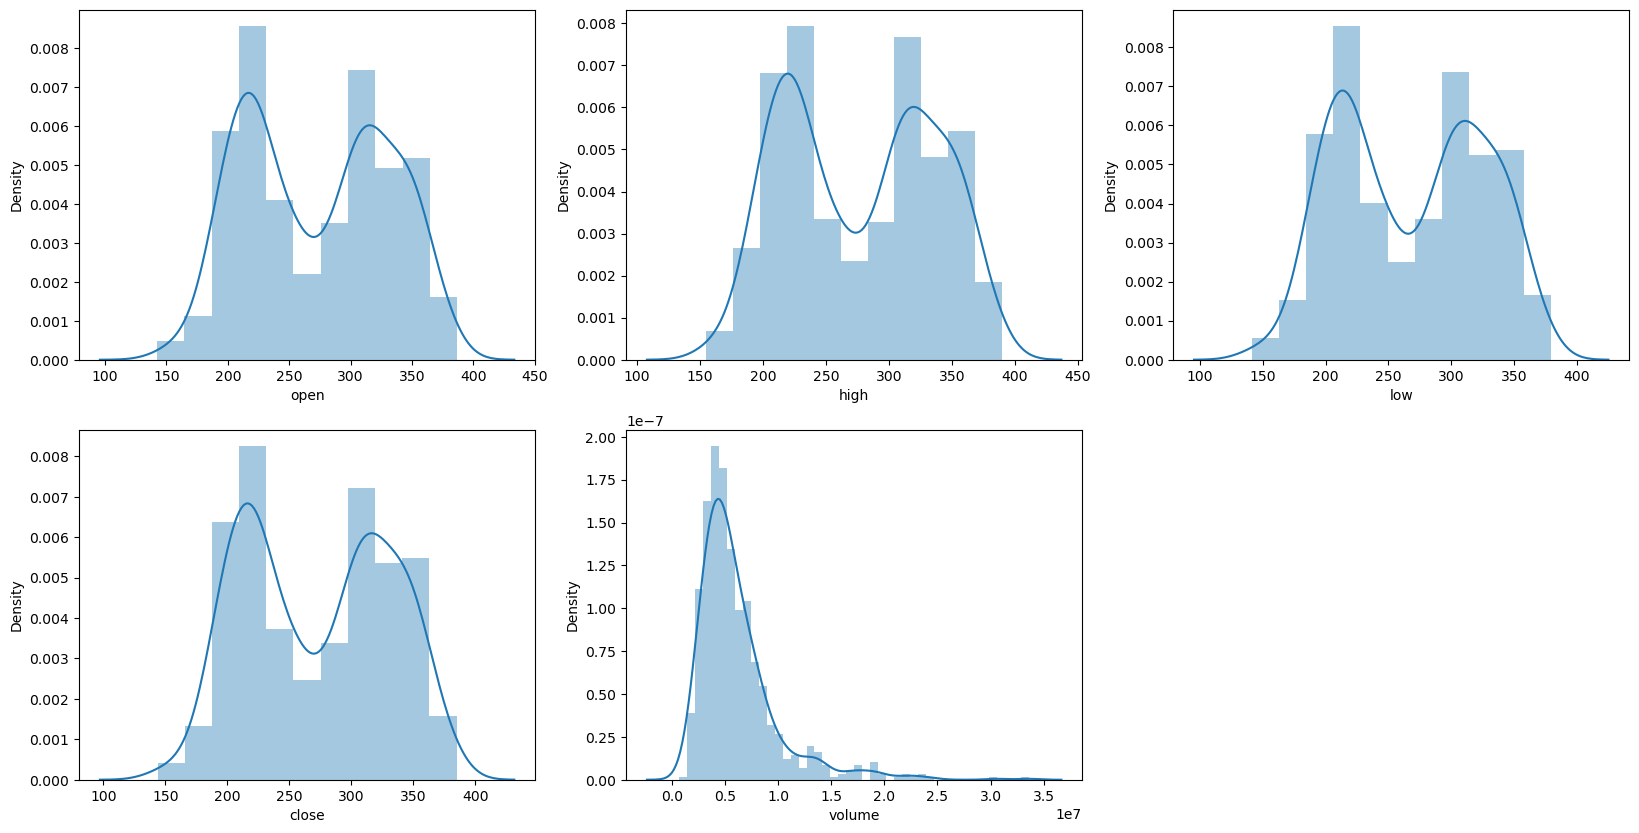

In [48]:
features = ['open', 'high', 'low', 'close', 'volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

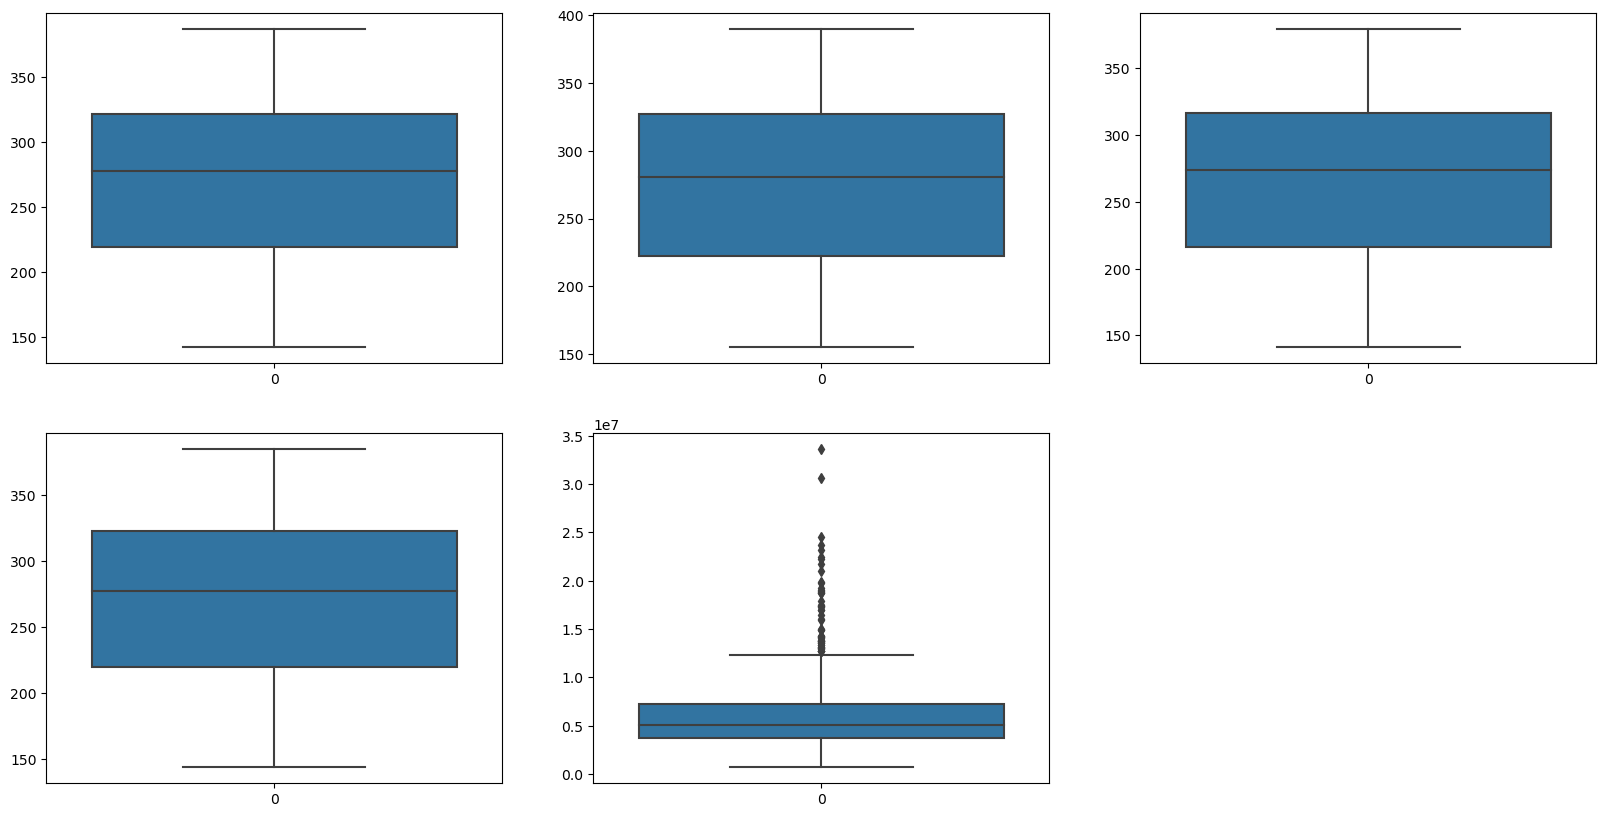

In [49]:
plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

In [76]:
splitted = df['date'].str.split('/', expand=True)

df['day'] = pd.to_numeric(splitted[2], errors='coerce').fillna(0).astype(int)
df['month'] = pd.to_numeric(splitted[1], errors='coerce').fillna(0).astype(int)
df['year'] = pd.to_numeric(splitted[0], errors='coerce').fillna(0).astype(int)
df.head()


,date,close,volume,open,high,low,day,month,year,is_quarter_end
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367,15,10,2018,0
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100,12,10,2018,0
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300,11,10,2018,0
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700,10,10,2018,0
5,2018/10/09,262.80,12037780.0000,255.25,266.77,253.3000,9,10,2018,0


In [68]:
df.head()

,date,close,volume,open,high,low
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700
5,2018/10/09,262.80,12037780.0000,255.25,266.77,253.3000


In [70]:
df=df.drop(index=0)

KeyError: '[0] not found in axis'

In [77]:
df["is_quarter_end"]=np.where(df["month"]%3==0,1,0)
df.head()

,date,close,volume,open,high,low,day,month,year,is_quarter_end
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367,15,10,2018,0
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100,12,10,2018,0
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300,11,10,2018,0
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700,10,10,2018,0
5,2018/10/09,262.80,12037780.0000,255.25,266.77,253.3000,9,10,2018,0


In [78]:
df.tail()

,date,close,volume,open,high,low,day,month,year,is_quarter_end
752,2015/10/21,210.09,4177956.0000,211.99,214.8100,208.80,21,10,2015,0
753,2015/10/20,213.03,14877020.0000,227.72,228.6000,202.00,20,10,2015,0
754,2015/10/19,228.10,2506836.0000,226.50,231.1500,224.94,19,10,2015,0
755,2015/10/16,227.01,4327574.0000,223.04,230.4805,222.87,16,10,2015,0
756,2015/10/15,221.31,2835920.0000,216.43,221.7300,213.70,15,10,2015,0


In [82]:
df['open-close']  = df['open'] - df['close']
df['low-high']  = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)

In [83]:
df.head()

,date,close,volume,open,high,low,day,month,year,is_quarter_end,open-close,low-high,target
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367,15,10,2018,0,-0.53,-8.7433,0
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100,12,10,2018,0,2.22,-9.9800,0
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300,11,10,2018,0,5.30,-13.2200,1
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700,10,10,2018,0,7.73,-17.7400,1
5,2018/10/09,262.80,12037780.0000,255.25,266.77,253.3000,9,10,2018,0,-7.55,-13.4700,0


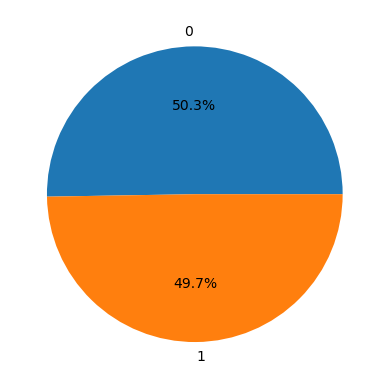

In [84]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

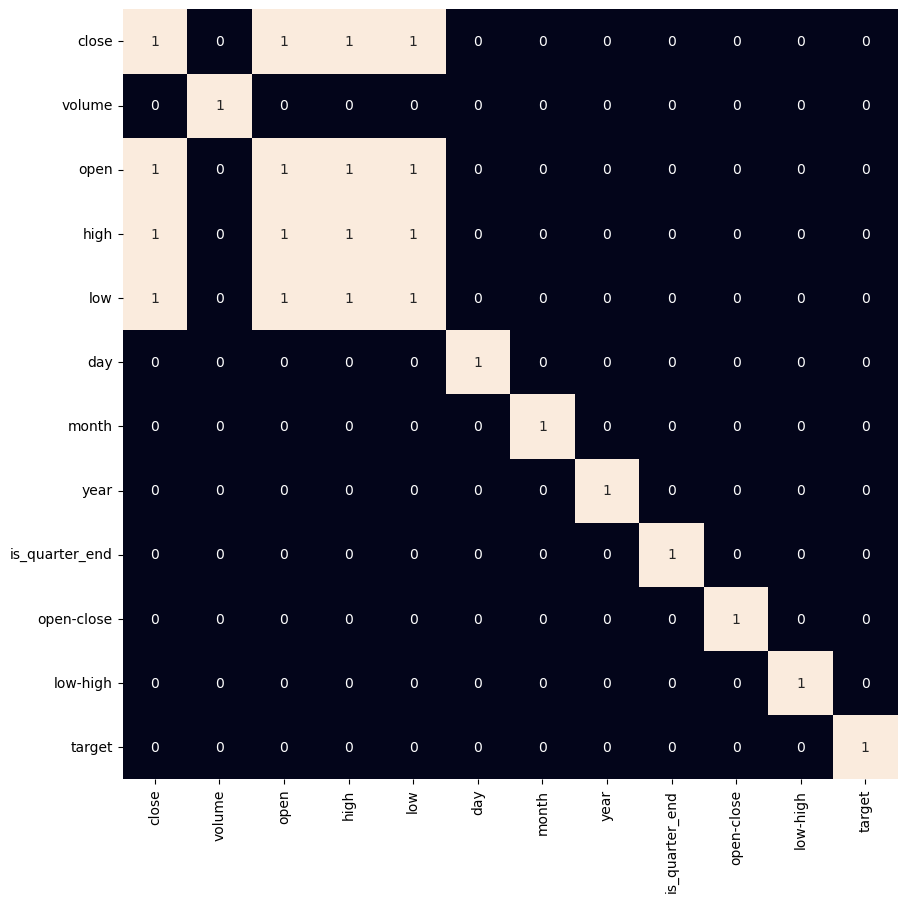

In [92]:
plt.figure(figsize=(10,10))
sns.heatmap(df.drop('date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

In [93]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, Y_train, Y_test = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_test.shape)

(680, 3) (76, 3)


In [98]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True)]

for i in range(2):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_test, models[i].predict_proba(X_test)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.9116522491349481
Validation Accuracy :  0.9277777777777778

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.9093858131487889
Validation Accuracy :  0.9093749999999999

